**Problem**



1. Customer belongs to which group
2. Which variables are the most significant




#Importing Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


#Loading the data

In [2]:
! wget https://homepage.boku.ac.at/leisch/MSA/datasets/mcdonalds.csv

--2023-06-13 03:30:05--  https://homepage.boku.ac.at/leisch/MSA/datasets/mcdonalds.csv
Resolving homepage.boku.ac.at (homepage.boku.ac.at)... 141.244.187.13
Connecting to homepage.boku.ac.at (homepage.boku.ac.at)|141.244.187.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 96988 (95K) [text/x-comma-separated-values]
Saving to: ‘mcdonalds.csv’

mcdonalds.csv       100%[===================>]  94.71K   206KB/s    in 0.5s    

2023-06-13 03:30:06 (206 KB/s) - ‘mcdonalds.csv’ saved [96988/96988]



In [3]:
df = pd.read_csv('mcdonalds.csv')

In [4]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


#Checking For null values

In [6]:
df.isna().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64



*  There are no null values



In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1453.0,44.604955,14.221178,18.0,33.0,45.0,57.0,71.0


In [8]:
category = []
for i in df.columns:
  if df[i].dtype=='O':
    category.append(i)


for i in category:
  print('Distribution of',i)
  print(df[i].value_counts())
  print('-'*60)


Distribution of yummy
Yes    803
No     650
Name: yummy, dtype: int64
------------------------------------------------------------
Distribution of convenient
Yes    1319
No      134
Name: convenient, dtype: int64
------------------------------------------------------------
Distribution of spicy
No     1317
Yes     136
Name: spicy, dtype: int64
------------------------------------------------------------
Distribution of fattening
Yes    1260
No      193
Name: fattening, dtype: int64
------------------------------------------------------------
Distribution of greasy
Yes    765
No     688
Name: greasy, dtype: int64
------------------------------------------------------------
Distribution of fast
Yes    1308
No      145
Name: fast, dtype: int64
------------------------------------------------------------
Distribution of cheap
Yes    870
No     583
Name: cheap, dtype: int64
------------------------------------------------------------
Distribution of tasty
Yes    936
No     517
Name: tasty, 

Observations



* Majority of the customers visits once a month
* +3 is given my most of the customers
* 60% customers find the food yummy
* Approx 90 percent doesn't find convinent and spicy
* Most of the customers found the service fast and cheap
* A few customers found the food disgusting
* Majority customers are Female











In [9]:
df['Age'].value_counts().sort_values()


71     1
19    10
68    13
69    14
70    15
18    16
21    16
66    17
28    18
46    19
20    21
45    22
41    23
65    23
22    23
54    24
63    25
27    25
43    25
48    26
67    26
61    26
33    26
25    26
38    27
31    27
40    27
30    28
29    28
34    28
39    29
23    30
42    30
47    30
51    30
35    30
24    30
26    31
53    31
44    32
64    32
56    32
32    33
50    34
62    34
49    34
36    35
58    35
52    36
57    36
59    36
37    37
60    38
55    53
Name: Age, dtype: int64

In [10]:
#creating bins for the age

df['Agebin'] = pd.cut(df['Age'], bins = [17,25, 35, 49, 60, 75], labels = ['17-25','26-35', '36-49', '50-60', '61-75'])


#Data Visualization

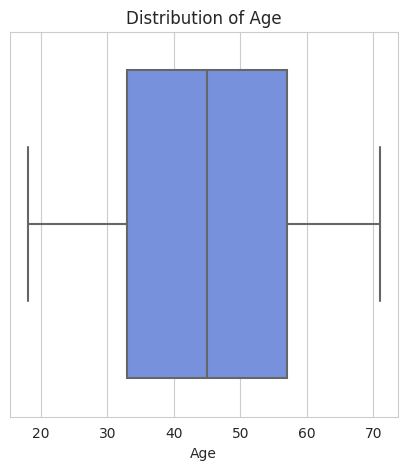

In [11]:
sns.set_style('whitegrid')
plt.figure(figsize=(5,5))
sns.set_palette('coolwarm')
sns.boxplot(x=df['Age'])
plt.title('Distribution of Age')
plt.show()




* There are no outliers in the Age




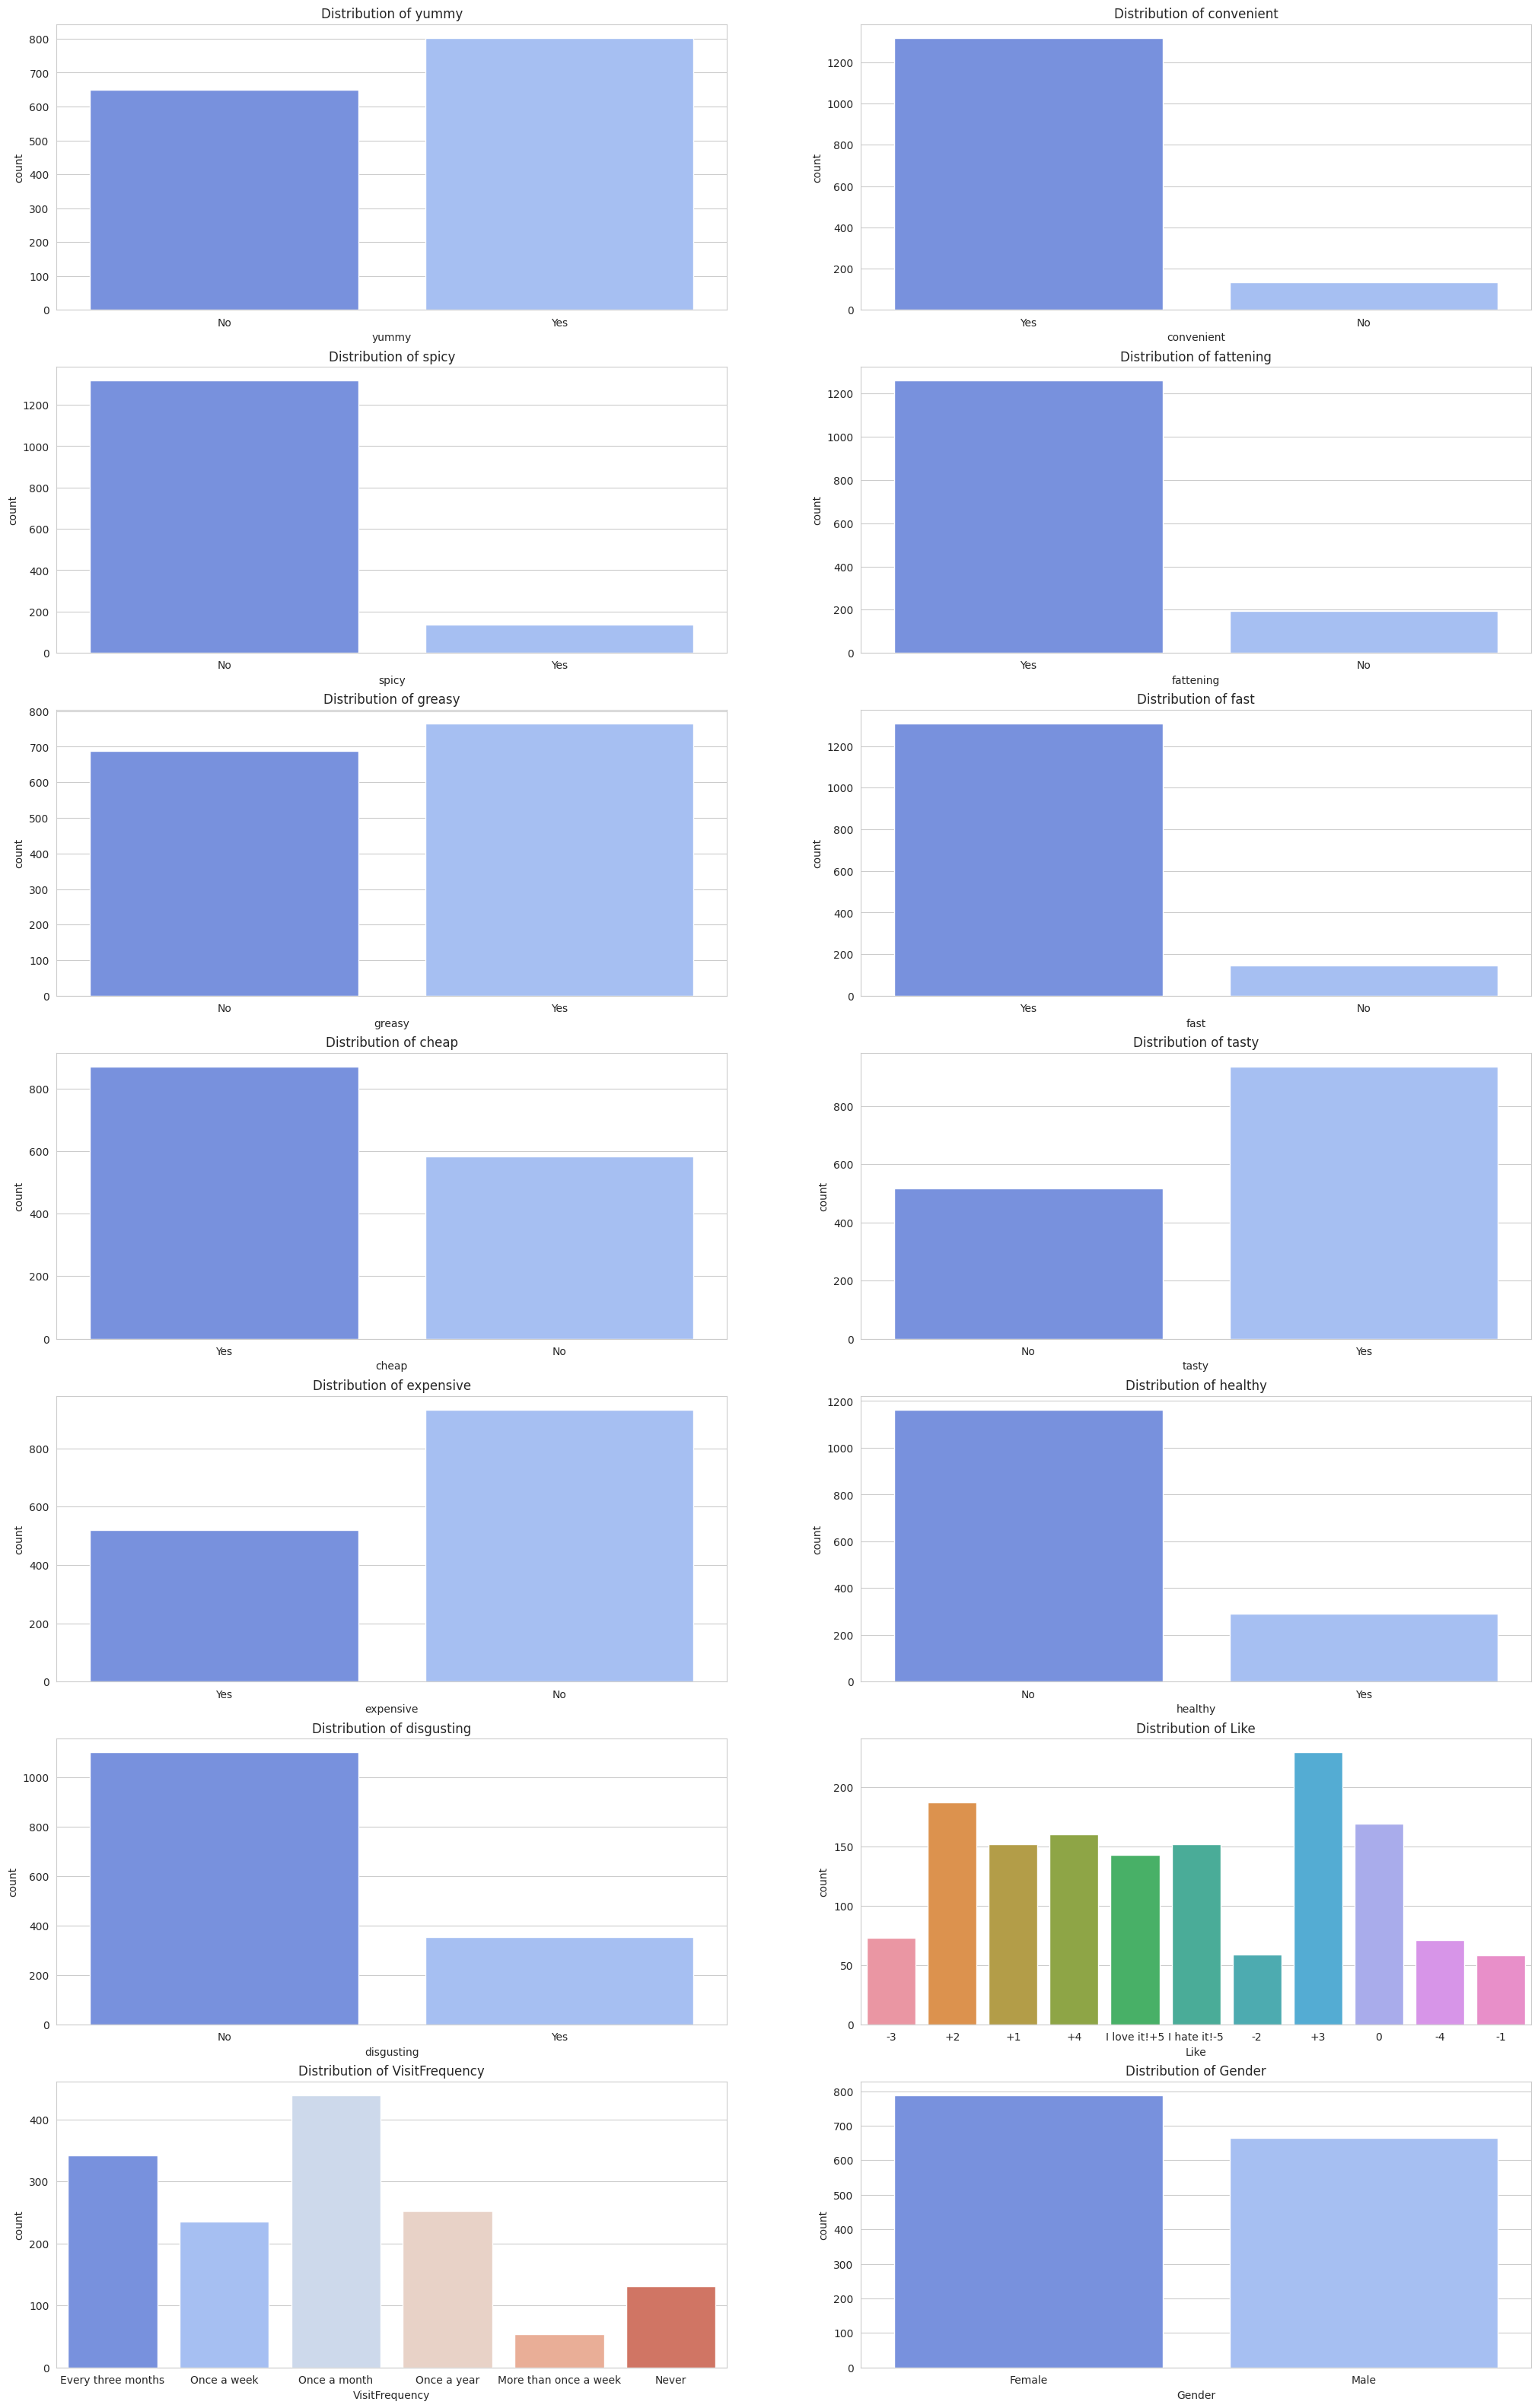

In [12]:
fig,([ax0,ax1],[ax2,ax3],[ax4,ax5],[ax6,ax7],[ax8,ax9],[ax10,ax11],[ax12,ax13]) = plt.subplots(ncols=2,nrows=7,figsize=(25,40))

ax = [ax0,ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12,ax13]
for i in range(0,14):
  sns.countplot(data=df,x=category[i],ax=ax[i])
  ax[i].set_title('Distribution of '+category[i])

plt.savefig('count.png')


Observations

* There are many customers who have never visited once
* Majority of the customers visit once a month
* +3 and +2 is given by approx 30 percent the customers
* 60% customers found the food yummy
* A big group of customers said the food is fatty



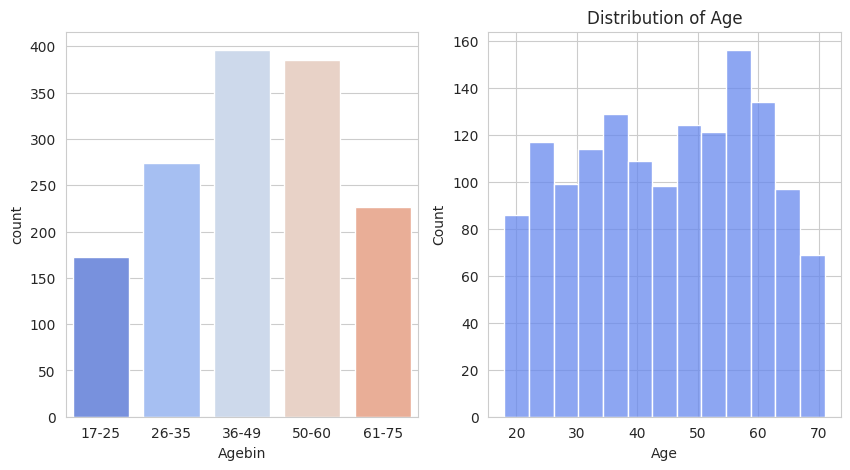

In [13]:
fig,[ax0,ax1] = plt.subplots(nrows=1,ncols=2,figsize=(10,5))
sns.countplot(x=df['Agebin'],ax=ax0)
sns.histplot(x=df['Age'],ax=ax1)
plt.title('Distribution of Age')
plt.savefig('count1.png')
plt.show()


Observations



*  Majority of the customers aged between 36-49

* Distribution of age is quite a normal

* Atleast 10 percent of the customers belongs to each of the age group





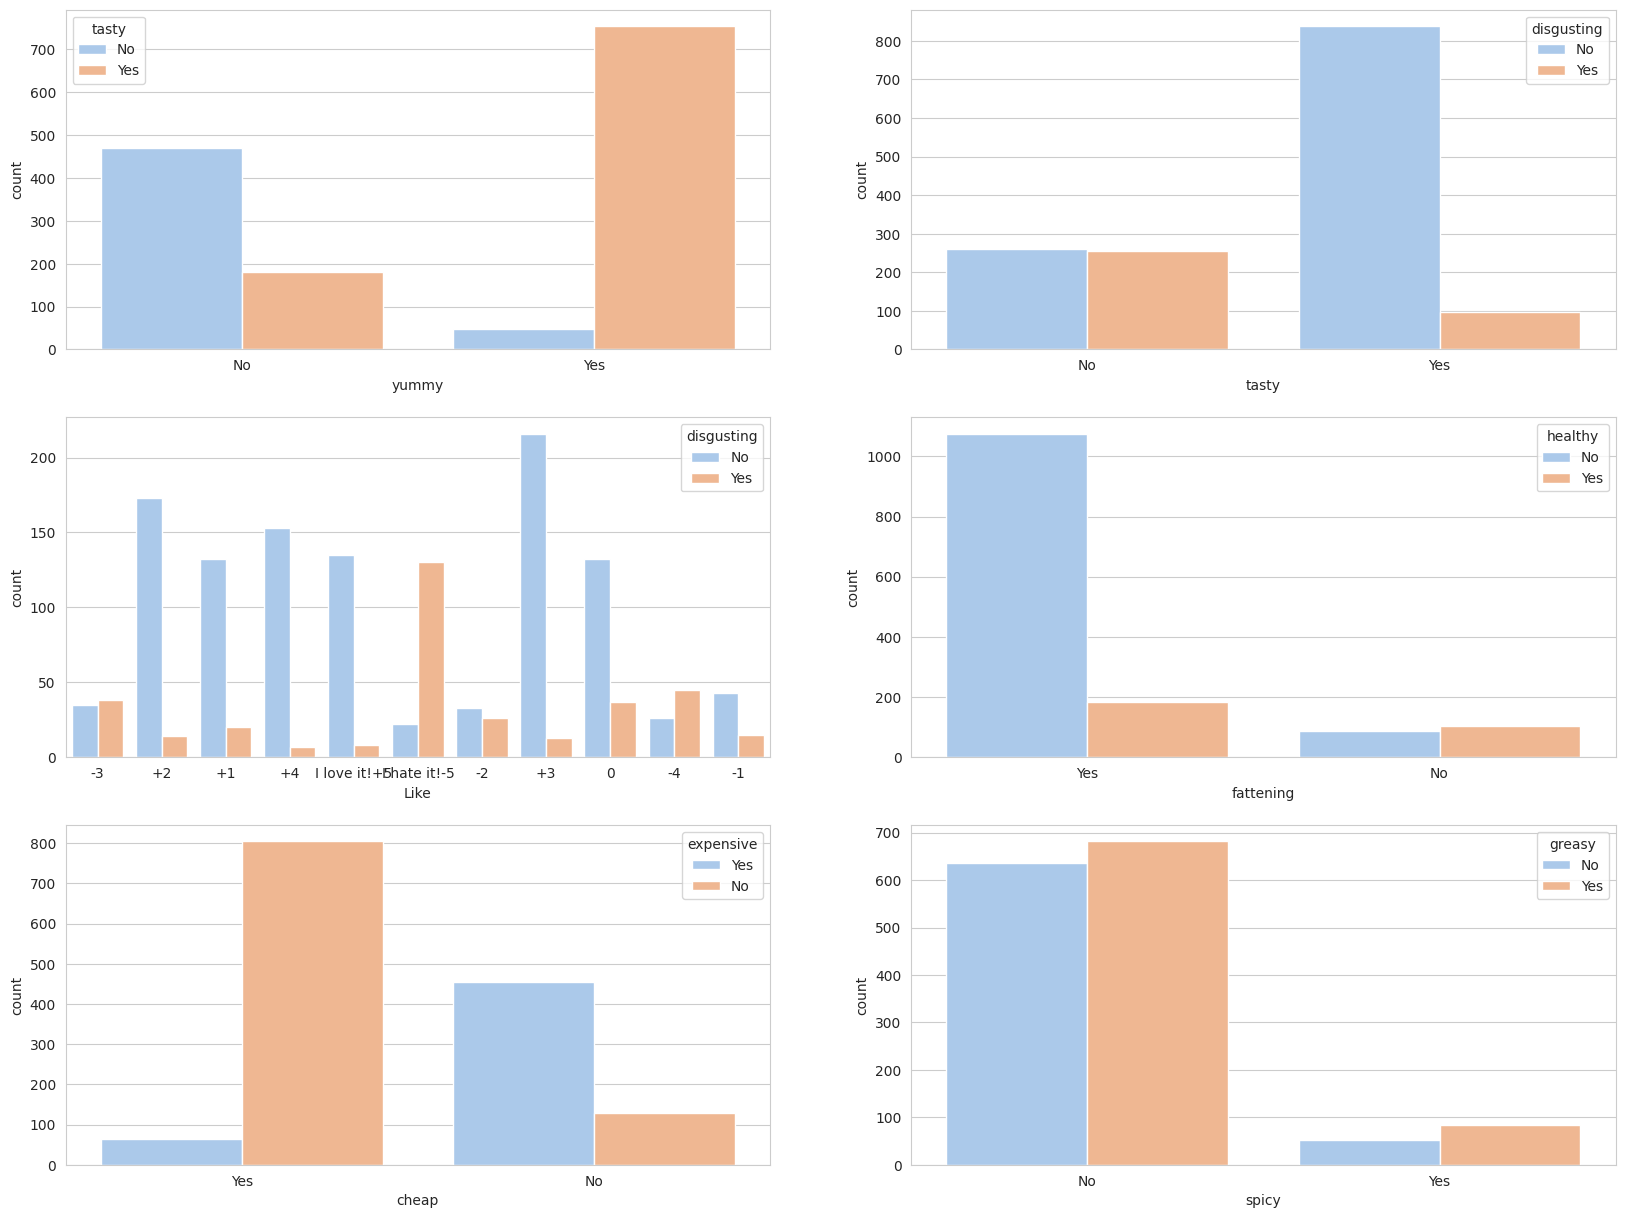

In [14]:
sns.set_palette('pastel')
fig,([ax0,ax1],[ax2,ax3],[ax4,ax5]) = plt.subplots(nrows=3,ncols=2,figsize=(20,15))
sns.countplot(x=df['yummy'],hue=df['tasty'],ax=ax0)
sns.countplot(x=df['tasty'],hue=df['disgusting'],ax=ax1)
sns.countplot(hue=df['disgusting'],x=df['Like'],ax=ax2)
sns.countplot(x=df['fattening'],hue=df['healthy'],ax=ax3)
sns.countplot(x=df['cheap'],hue=df['expensive'],ax=ax4)
sns.countplot(x=df['spicy'],hue=df['greasy'],ax=ax5)
plt.savefig('count2.png')
plt.show()


Observations

* From the plot it is observed that the data have alot of discrepencies




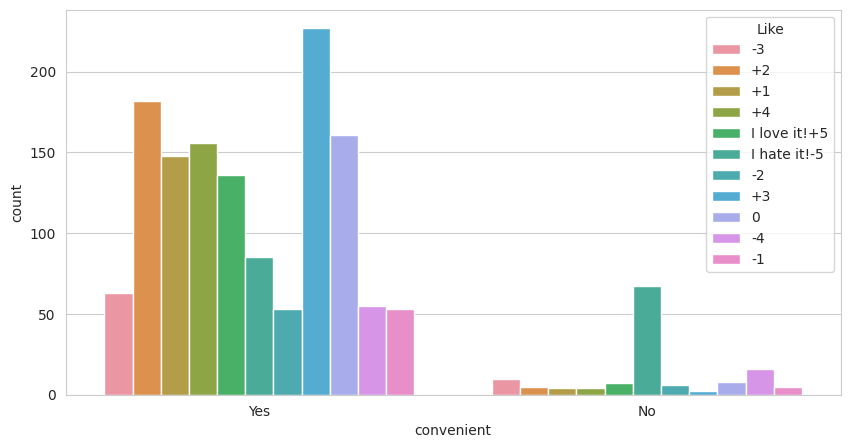

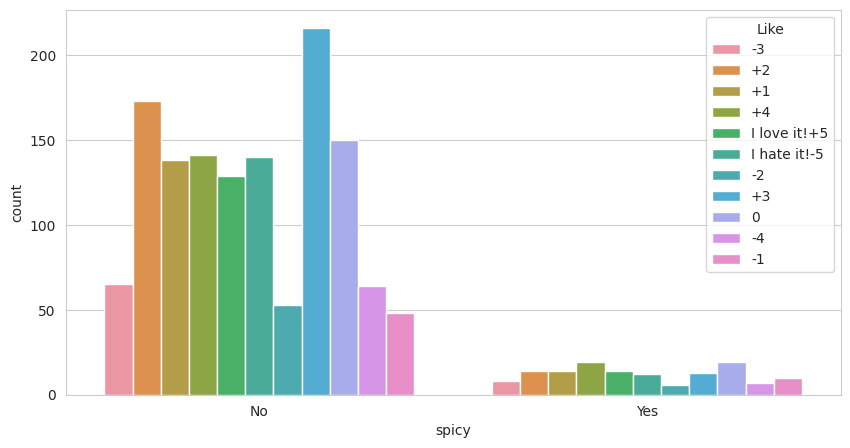

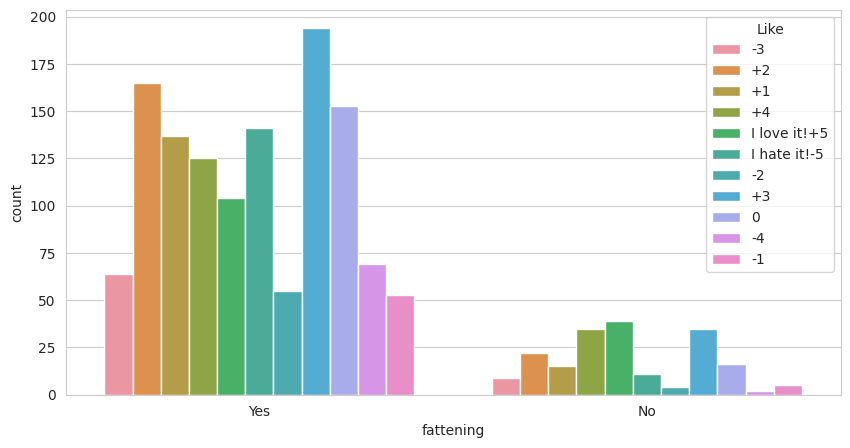

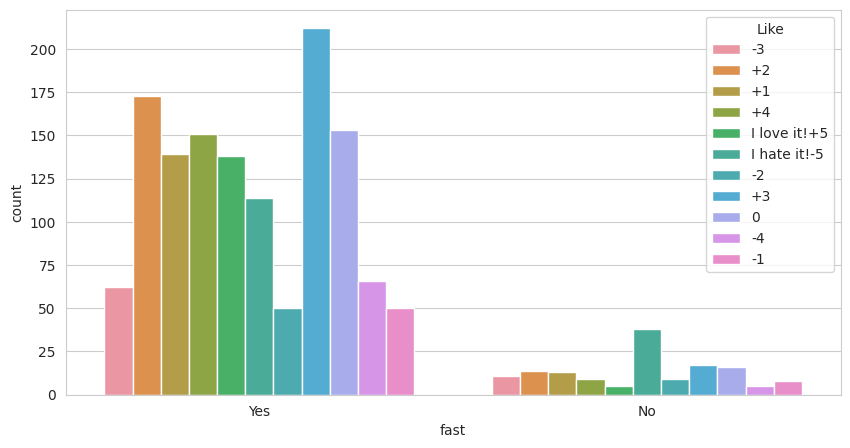

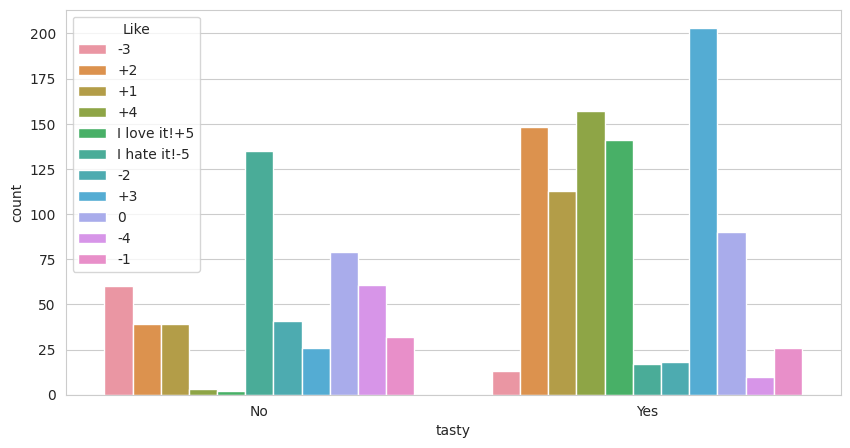

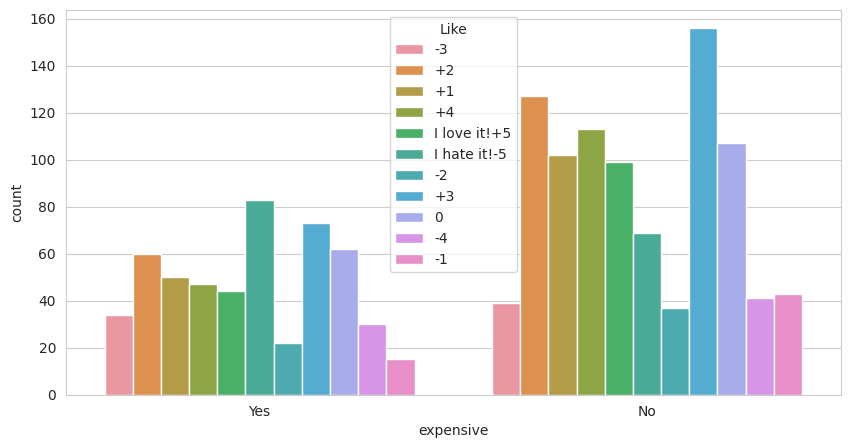

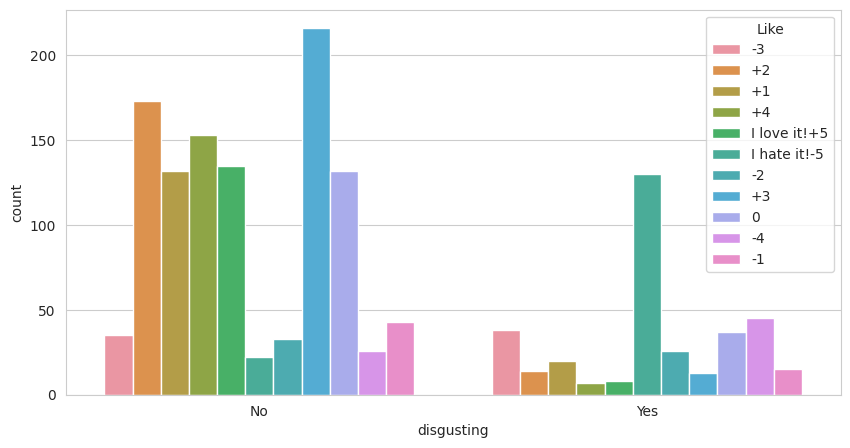

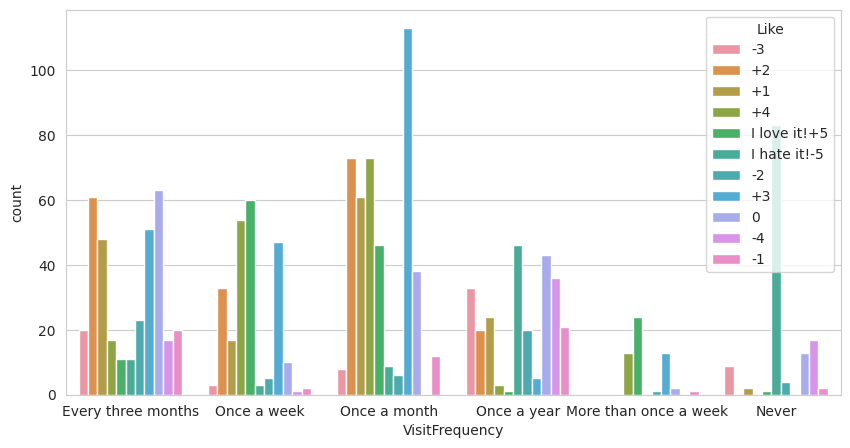

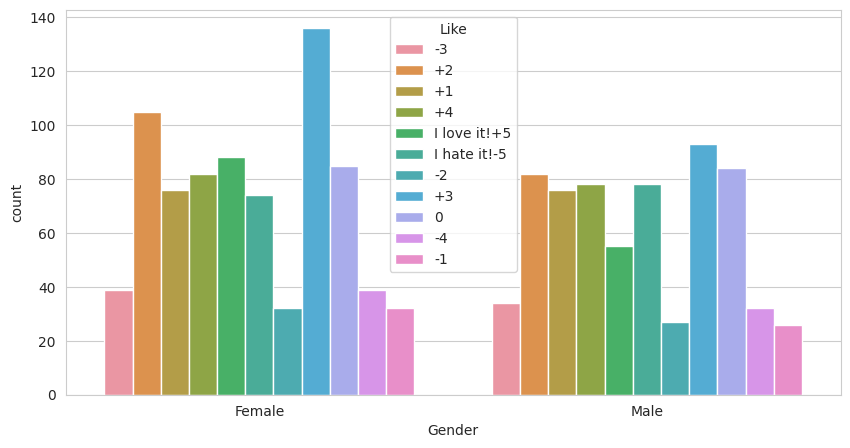

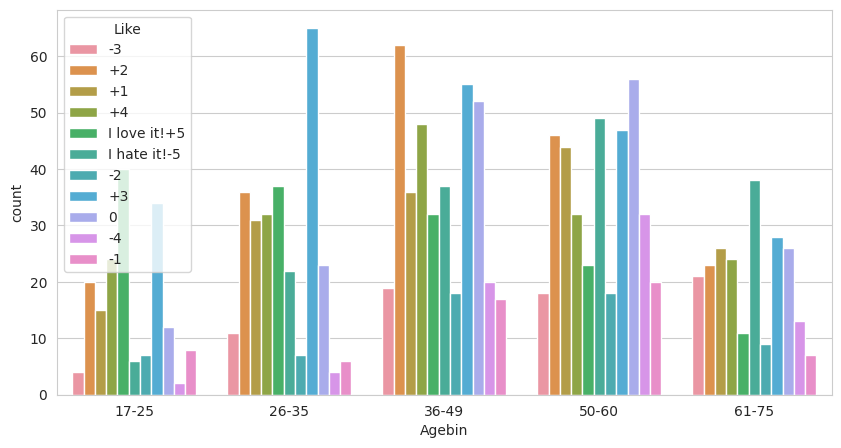

<Figure size 640x480 with 0 Axes>

In [15]:
sns.set_style('whitegrid')
for i in df.drop(['Like','yummy','cheap','healthy','greasy','Age'],axis=1).columns:
  plt.figure(figsize=(10,5))
  sns.countplot(x=df[i],hue=df['Like'])
  plt.show()

plt.savefig('count3.png')


Observations

* Female customers are more likley to rate +3 where as males ratings are almost equally distributed
* Customers visiting more than once a week more likely to rate "I love it!"
* Customers who visited once in a month majority times rated +3
* Those who never visited the store have given worst rating




In [16]:
import warnings
warnings.filterwarnings("ignore")

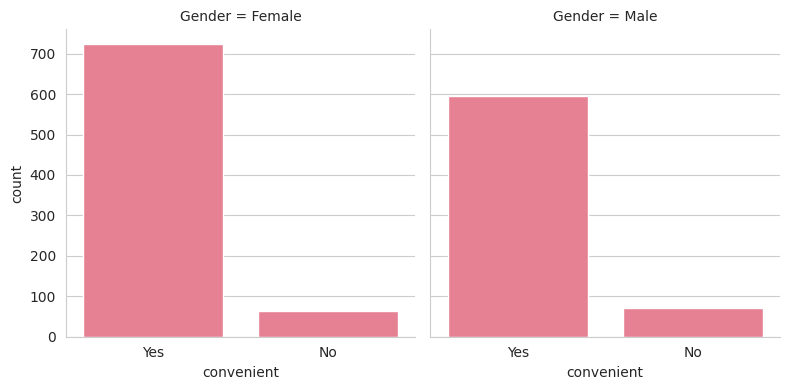

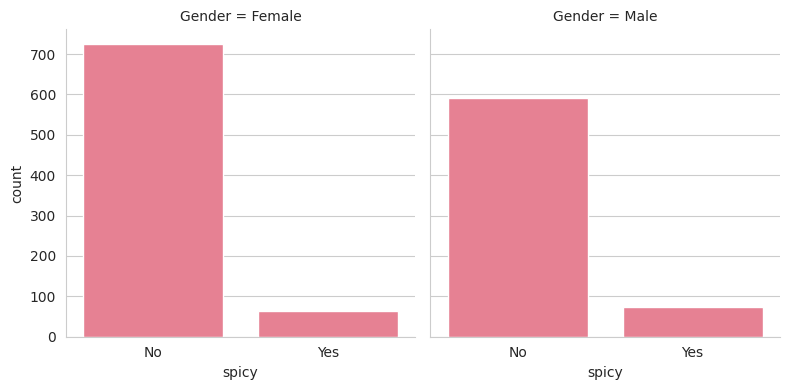

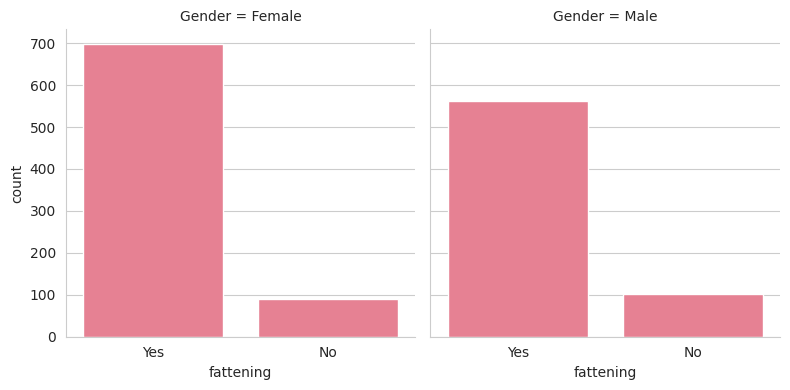

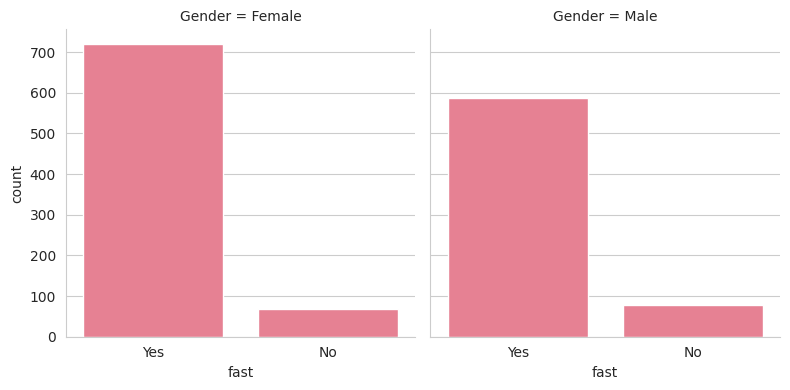

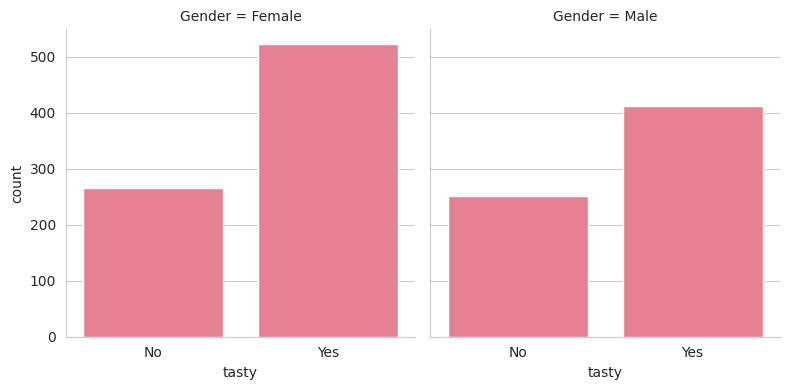

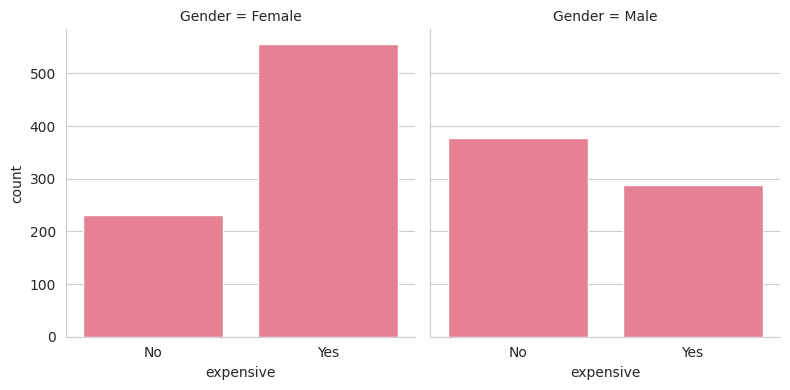

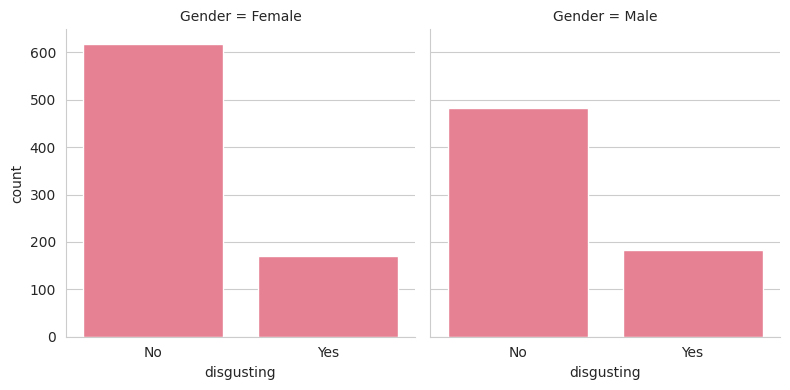

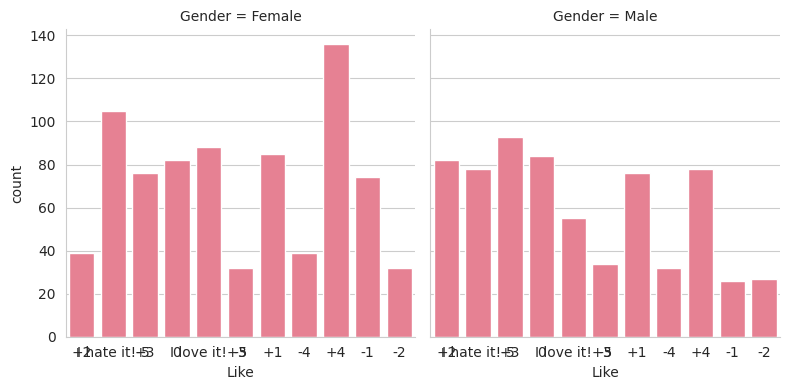

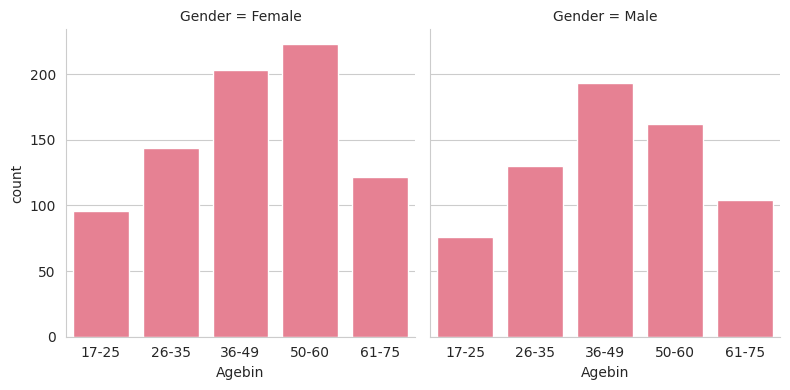

In [17]:
sns.set_palette('husl')
for i in df.drop(['Gender','yummy','cheap','healthy','greasy','Age','VisitFrequency'],axis=1):
  grid = sns.FacetGrid(df,height=4,col='Gender')
  grid = grid.map(sns.countplot,i)
plt.savefig('count4.png')
plt.show()


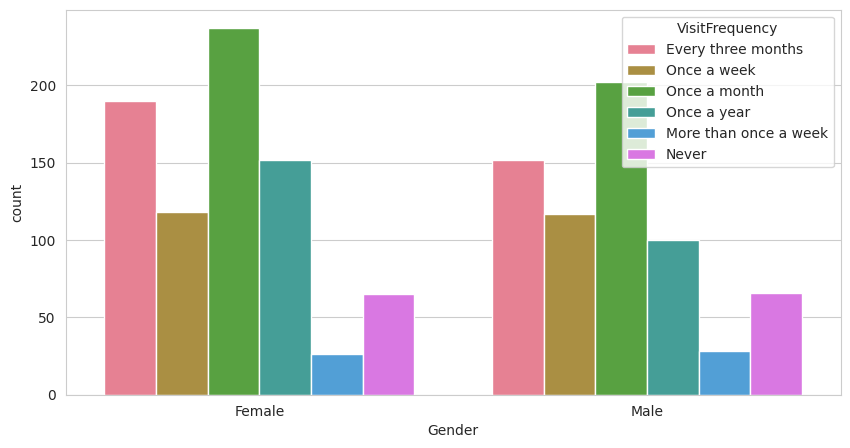

In [18]:
plt.figure(figsize=(10,5))
sns.countplot(hue=df['VisitFrequency'],x=df['Gender'])
plt.savefig('count5.png')


Observations

* Female customers found it less convenient than male customers
* Majority of the female customers found the food expensive where as males doesn't






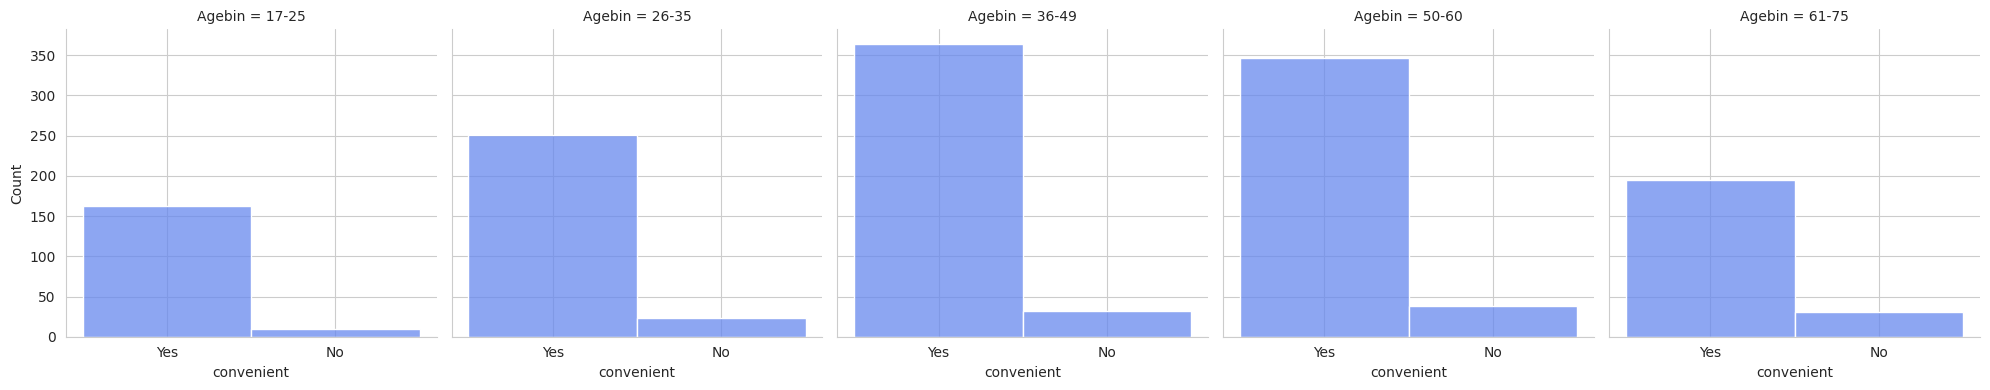

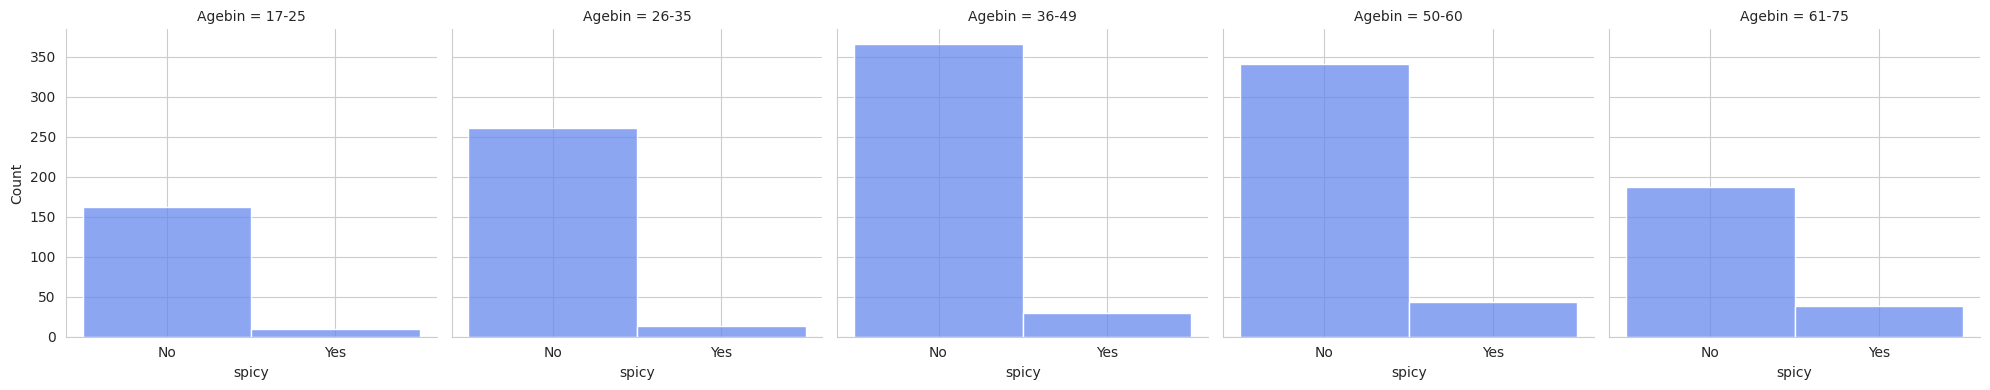

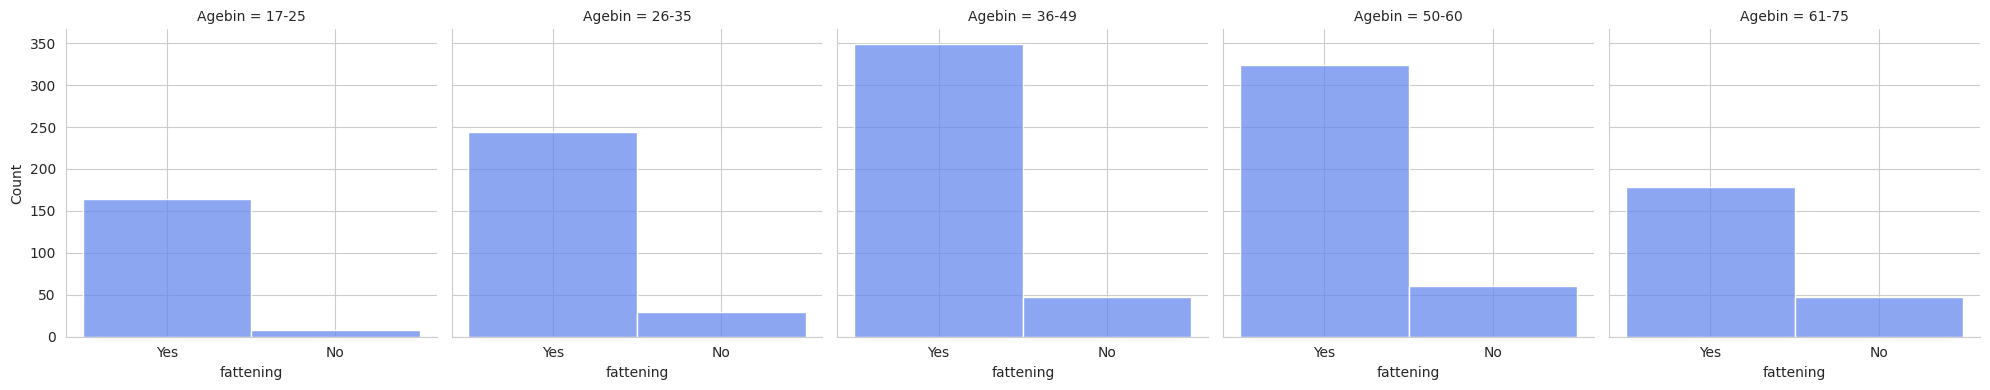

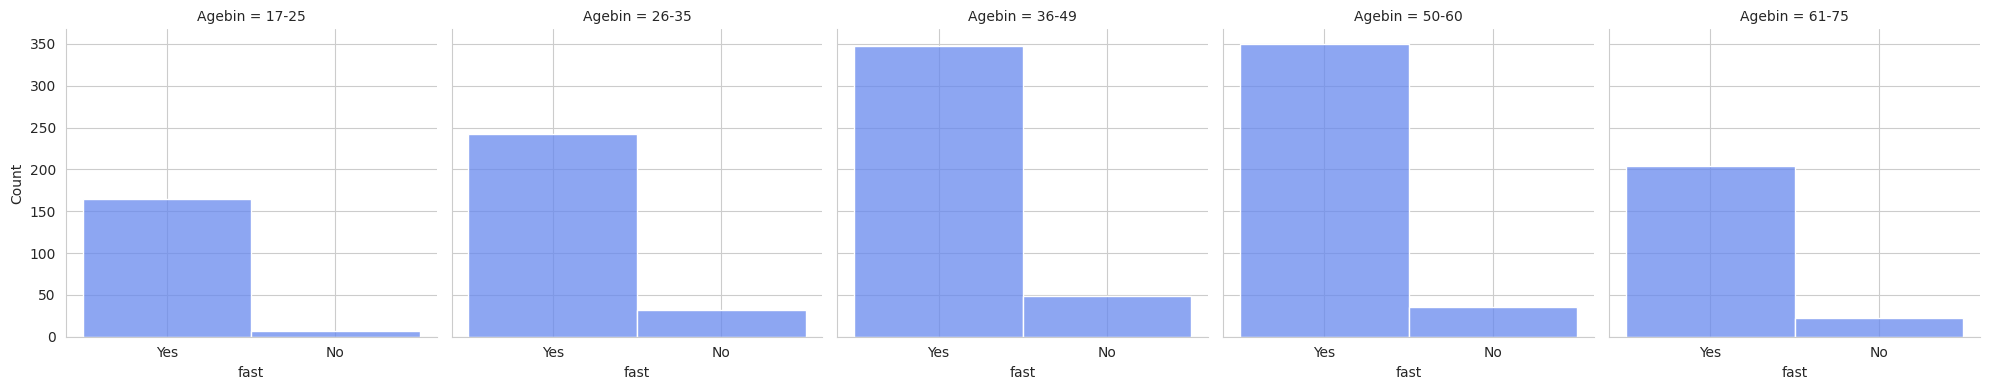

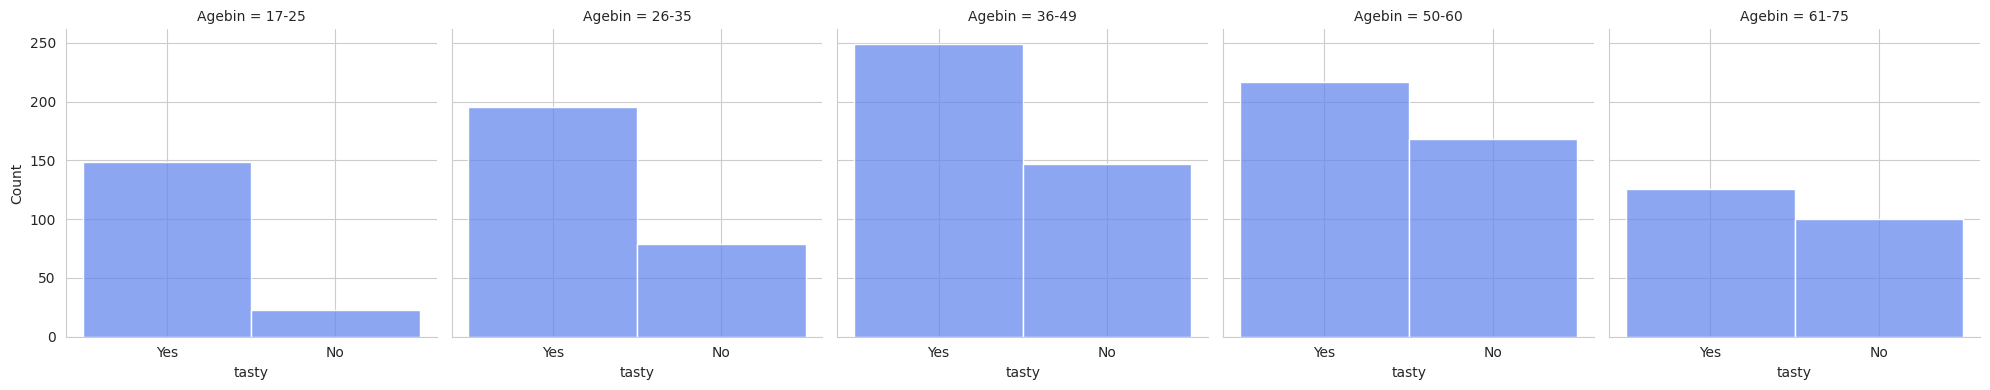

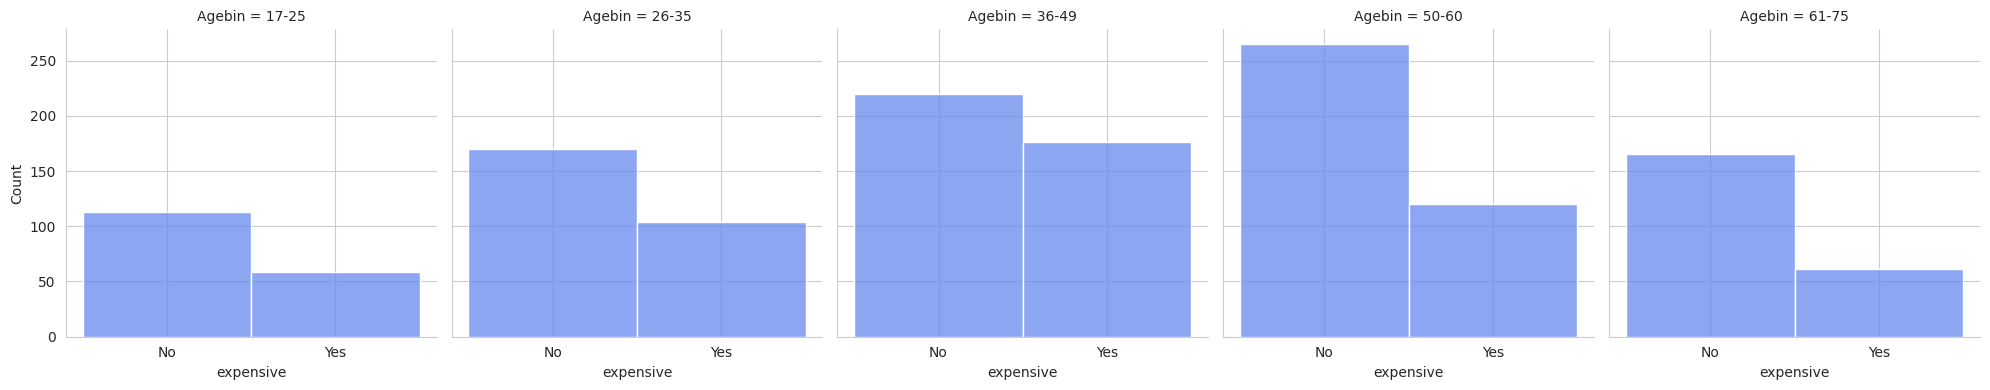

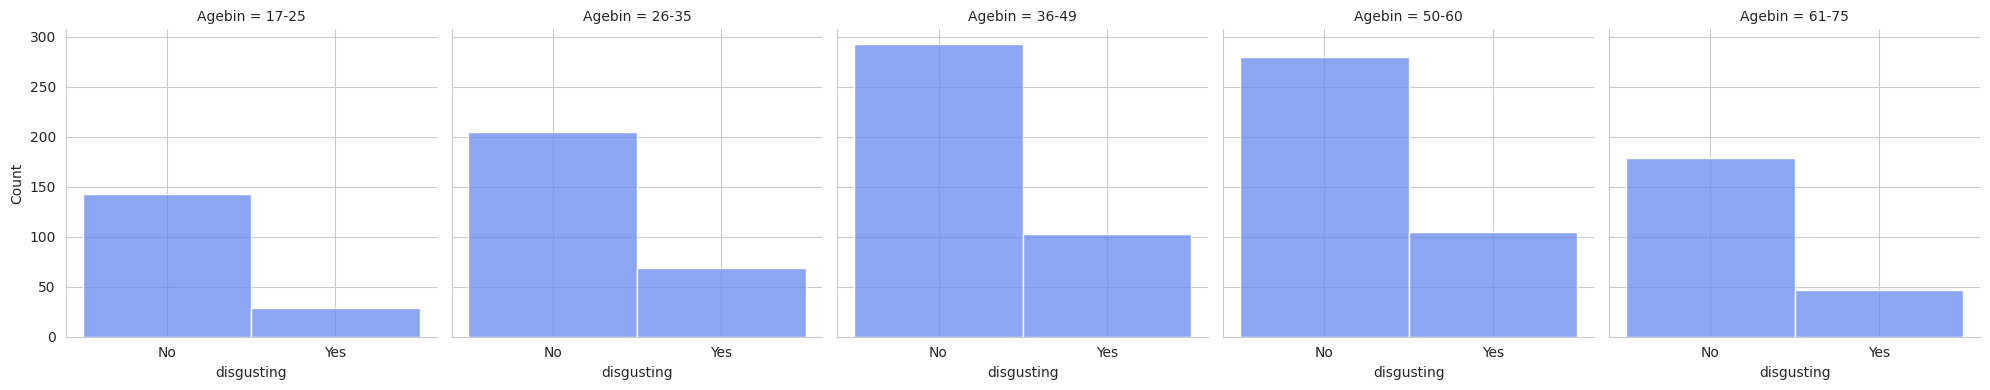

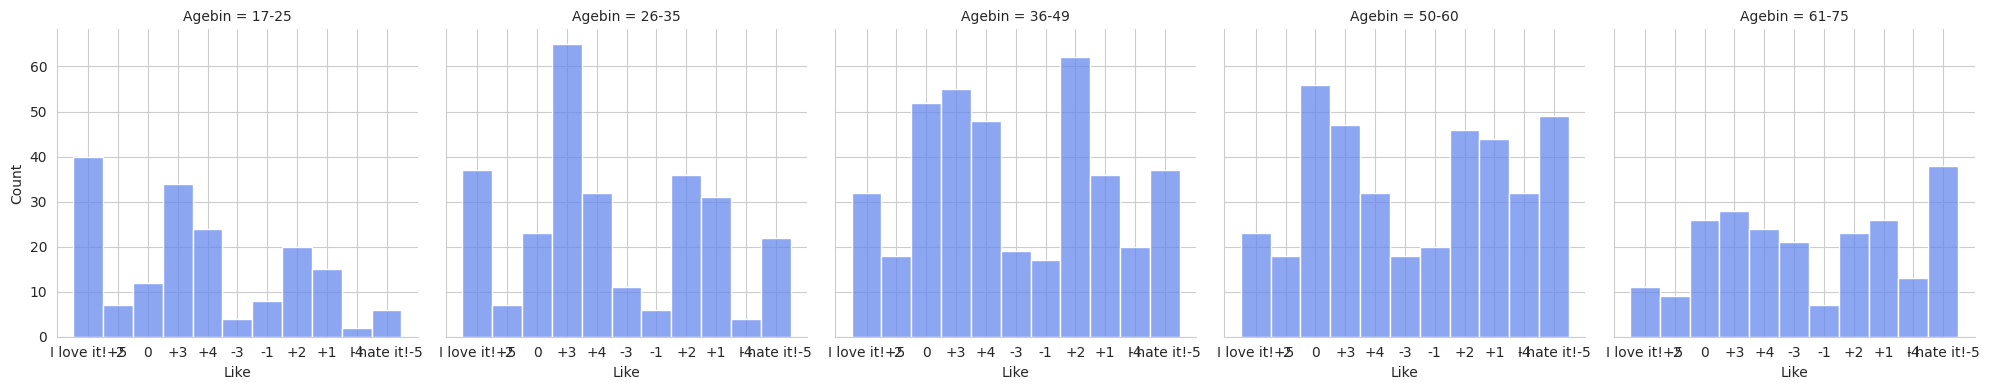

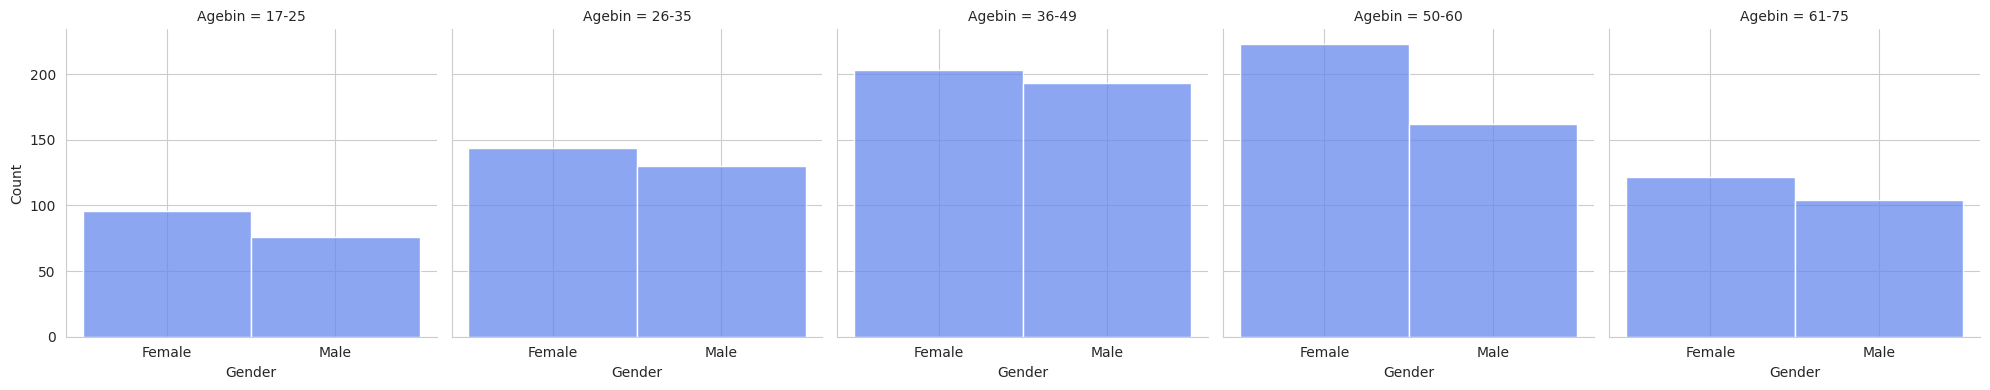

In [19]:
sns.set_palette('coolwarm')
for i in df.drop(['Agebin','yummy','cheap','healthy','greasy','Age','VisitFrequency'],axis=1):
  grid = sns.FacetGrid(df,height=4,col='Agebin')
  grid = grid.map(sns.histplot,i,bins=30)
plt.savefig('count6.png')
plt.show()


#Data Preprocessing

In [20]:
# converting into numericals
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   yummy           1453 non-null   object  
 1   convenient      1453 non-null   object  
 2   spicy           1453 non-null   object  
 3   fattening       1453 non-null   object  
 4   greasy          1453 non-null   object  
 5   fast            1453 non-null   object  
 6   cheap           1453 non-null   object  
 7   tasty           1453 non-null   object  
 8   expensive       1453 non-null   object  
 9   healthy         1453 non-null   object  
 10  disgusting      1453 non-null   object  
 11  Like            1453 non-null   object  
 12  Age             1453 non-null   int64   
 13  VisitFrequency  1453 non-null   object  
 14  Gender          1453 non-null   object  
 15  Agebin          1453 non-null   category
dtypes: category(1), int64(1), object(14)
memory usage: 172.0+ KB

In [21]:
df['yummy'] = df['yummy'].replace(['Yes','No'],[1,0])
df['convenient'] = df['convenient'].replace(['Yes','No'],[1,0])
df['spicy'] = df['spicy'].replace(['Yes','No'],[1,0])
df['fattening'] = df['fattening'].replace(['Yes','No'],[1,0])
df['greasy'] = df['greasy'].replace(['Yes','No'],[1,0])
df['fast'] = df['fast'].replace(['Yes','No'],[1,0])
df['cheap'] = df['cheap'].replace(['Yes','No'],[1,0])
df['tasty'] = df['tasty'].replace(['Yes','No'],[1,0])
df['expensive'] = df['expensive'].replace(['Yes','No'],[1,0])
df['healthy'] = df['healthy'].replace(['Yes','No'],[1,0])
df['disgusting'] = df['disgusting'].replace(['Yes','No'],[1,0])
df['Gender'] = df['Gender'].replace(['Male','Female'],[1,0])
df['VisitFrequency'] = df['VisitFrequency'].replace(['Never','Once a year','Every three months','Once a month','Once a week','More than once a week'],[0,1,2,3,4,5])
df['Like'] = df['Like'].replace(['I hate it!-5','-4','-3','-2','-1','0','+1','+2','+3','+4','I love it!+5'],[-5,-4,-3,-2,-1,0,1,2,3,4,5])


In [22]:
df.head()


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,Agebin
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,2,0,61-75
1,1,1,0,1,1,1,1,1,1,0,0,2,51,2,0,50-60
2,0,1,1,1,1,1,0,1,1,1,0,1,62,2,0,61-75
3,1,1,0,1,1,1,1,1,0,0,1,4,69,4,0,61-75
4,0,1,0,1,1,1,1,0,0,1,0,2,49,3,1,36-49


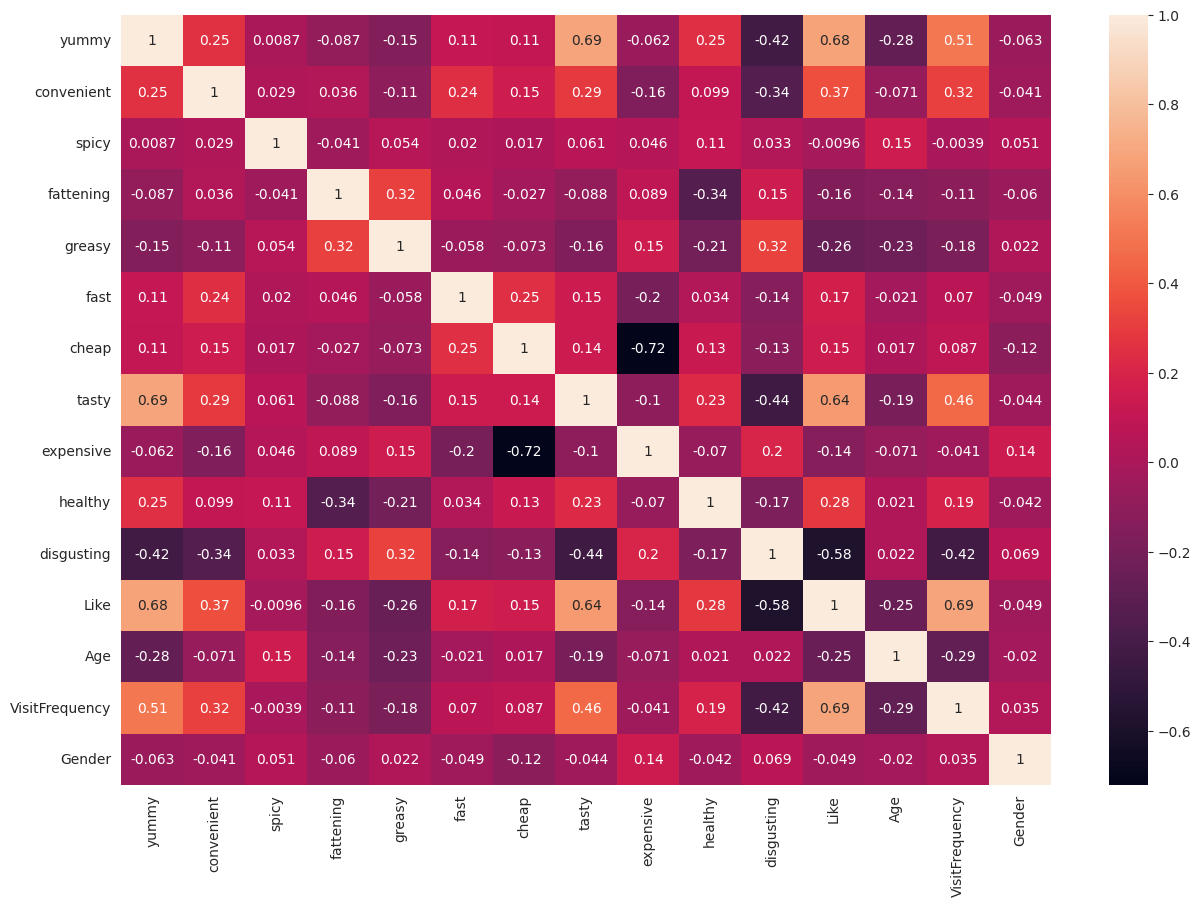

In [23]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)
plt.savefig('count7.png')